# Market Abuse Detection

## Objective

In this task we need to retrieve stock data for Amazon and analyse some client 
data in order to find some suspicious behaviours.

## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib

import seaborn as sns
import matplotlib.pyplot as plt

# For reading stock data from yahoo
import pandas_datareader.data as pdr

# For time stamps
from datetime import datetime

# Print versions of libraries
print(f"Numpy version : Numpy {np.__version__}")
print(f"Pandas version : Pandas {pd.__version__}")
print(f"Matplotlib version : Matplotlib {matplotlib.__version__}")
print(f"Seaborn version : Seaborn {sns.__version__}")

# Magic Functions for In-Notebook Display
%matplotlib inline

# Setting seabon style
sns.set(style='darkgrid', palette='colorblind')

# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

Numpy version : Numpy 1.18.5
Pandas version : Pandas 1.0.5
Matplotlib version : Matplotlib 3.2.2
Seaborn version : Seaborn 0.10.1


# Stock Dataset

### Import Stock Dataset
Downloading Amazon stock data from Yahoo for the months of February and March 2020

In [2]:
def get_stock_data(filename='stock_data.csv',stock = "AMZN", start_date = '2020-02-01',end_date = '2020-03-31',
                   force_download=False):
    """
    Download and cache the stock data
    
    Parameters
    ----------
    filename : string (optional)
        location to save the data
    stock : string (optional)
        company name of which stock data want to download from yahoo api.
    start_date : string (optional)
        date from where stock data should download
    end_date : string (optional)
        date till where stock data should download
    force_download : bool (optional)
        if True, force re-download of data from Yahoo API else read from local
        
    Returns
    -------
    data : pandas.DataFrame
        The company Stock data
    """
    
    if force_download:
        # Grabing yahoo finance data and setting as a dataframe
        stock_data = pdr.DataReader(stock, 'yahoo', start_date, end_date)
        # Save the stock data in form of .csv to local 
        stock_data.to_csv(filename)
        
    # force_download is false, then read data from local
    stock_data = pd.read_csv(filename, index_col='Date')

    try:
        stock_data.index = pd.to_datetime(stock_data.index, format='%Y-%m-%d')
    except TypeError:
        stock_data.index = pd.to_datetime(stock_data.index)

    return stock_data

In [3]:
# Print docstrings of method 
print(get_stock_data.__doc__)


    Download and cache the stock data
    
    Parameters
    ----------
    filename : string (optional)
        location to save the data
    stock : string (optional)
        company name of which stock data want to download from yahoo api.
    start_date : string (optional)
        date from where stock data should download
    end_date : string (optional)
        date till where stock data should download
    force_download : bool (optional)
        if True, force re-download of data from Yahoo API else read from local
        
    Returns
    -------
    data : pandas.DataFrame
        The company Stock data
    


In [4]:
# get_stock_data?

In [5]:
# collect data for Amazon from 2020-02-01 to 2020-03-31
stock_data = get_stock_data(filename='stock_data.csv',stock = "AMZN", 
                            start_date = '2020-02-01',end_date = '2020-03-31',force_download=False)

In [6]:
# Looking at sample rows in the data
stock_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-31,2055.719971,2002.270020,2051.469971,2008.719971,15567300,2008.719971
2020-02-03,2048.500000,2000.250000,2010.599976,2004.199951,5899100,2004.199951
2020-02-04,2059.800049,2015.369995,2029.880005,2049.669922,5289300,2049.669922
2020-02-05,2071.020020,2032.000000,2071.020020,2039.869995,4376200,2039.869995
2020-02-06,2056.300049,2024.800049,2041.020020,2050.229980,3183000,2050.229980


In [7]:
stock_data.index.dtype

dtype('<M8[ns]')

In [8]:
stock_data.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

### Move date from index to  columns
Pandas dataframes have an index that is used for grouping and fast lookups. The index is not considered one of the columns. To move the dates from the index to the columns, we can use reset_index(), which will make Date a column and make the index just a sequence of numbers counting up from 0.

In [9]:
stock_data.reset_index(inplace=True)

In [10]:
# Converting all column names to lower case
stock_data.columns = stock_data.columns.str.lower()

### Exploratory Data Analysis
Once the data is read into python, we need to explore/clean/filter it before processing it

#### Checking concise summary of dataset
It is also a good practice to know the features and their corresponding data types, along with finding whether they contain null values or not.

In [11]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       42 non-null     datetime64[ns]
 1   high       42 non-null     float64       
 2   low        42 non-null     float64       
 3   open       42 non-null     float64       
 4   close      42 non-null     float64       
 5   volume     42 non-null     int64         
 6   adj close  42 non-null     float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 2.4 KB


**Highlights**

* Dataset contains details of 42 days of stock price for Amazon in 7 features.
* There is no missing data in dataset, every column contain exactly 42 rows.
* Data type for 'date' is datetime64 which is required to compare the dates.
* Memory Usage: 2.4 KB

#### Delete duplicate data

In [12]:
# Checking duplicate data
print('Shape before deleting duplicate values:', stock_data.shape)

# Removing duplicate rows if any
stock_data = stock_data.drop_duplicates()
print('Shape After deleting duplicate values:', stock_data.shape)

Shape before deleting duplicate values: (42, 7)
Shape After deleting duplicate values: (42, 7)


#### Generate descriptive statistics
The describe() function generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values.

In [13]:
# Looking at the descriptive statistics of the data
# stock_data.describe(include='all')
stock_data.describe()

,high,low,open,close,volume,adj close
count,42.000000,42.000000,42.000000,42.000000,4.200000e+01,42.000000
mean,1997.033587,1928.853338,1959.332374,1963.259039,6.473969e+06,1963.259039
std,119.026586,143.603719,136.401280,128.808825,2.727553e+06,128.808825
min,1759.449951,1626.030029,1641.510010,1676.609985,2.561200e+06,1676.609985
25%,1924.497528,1823.709991,1871.910004,1884.685028,4.843725e+06,1884.685028
50%,1976.500000,1911.169983,1949.034973,1954.719971,6.012600e+06,1954.719971
75%,2068.215027,2030.200012,2049.099976,2050.089966,7.812025e+06,2050.089966
max,2185.949951,2161.120117,2173.070068,2170.219971,1.556730e+07,2170.219971


In [14]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
stock_data.nunique()

date         42
high         42
low          42
open         42
close        42
volume       42
adj close    42
dtype: int64

#### Trend of closing price in Feb & Mar

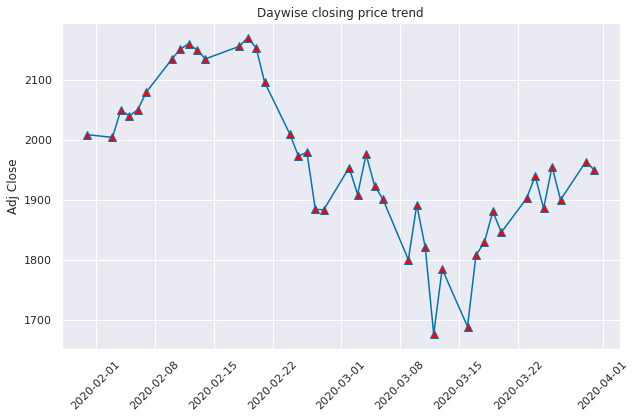

In [15]:
# Let's see a historical view of the Adj closing price

plt.figure(figsize=(10,6))
# stock_data.drop('Date', axis=1)['Adj Close'].plot()
plt.plot(stock_data['date'],stock_data['adj close'],color='b', linewidth=1.5,marker='^',markersize=8,
         linestyle='-',markerfacecolor='red')
plt.title("Daywise closing price trend")
plt.xticks(rotation=45)
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.show()

Broadly speaking, February month is better than March month for stock sellers.

#### Volume of stock being traded each day

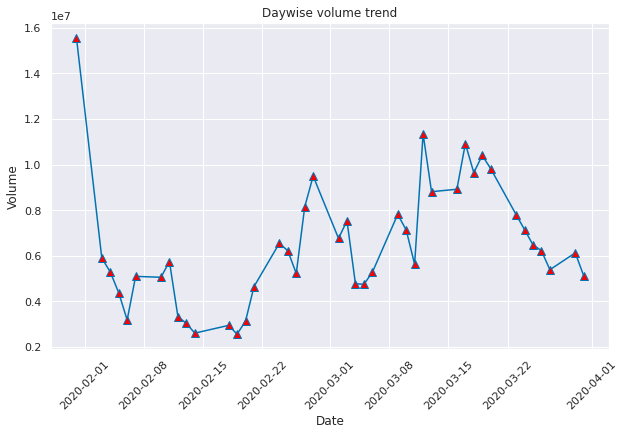

In [16]:
# Now let's plot the total volume of stock being traded each day

plt.figure(figsize=(10,6))
plt.plot(stock_data['date'],stock_data['volume'],color='b', linewidth=1.5,marker='^',markersize=8,
         linestyle='-',markerfacecolor='red')
plt.title("Daywise volume trend")
plt.xticks(rotation=45)
plt.ylabel('Volume')
plt.xlabel('Date')
plt.show()

# Traders Data

### Load the traders data from csv file

In [18]:
traders_data = pd.read_csv('traders_data.csv', encoding='latin')

# Looking at sample rows in the data
traders_data.head()

,countryCode,firstName,lastName,traderId,stockSymbol,stockName,tradeId,price,volume,tradeDatetime
0,TV,Vanessa,Green,MUVGtYHdeMdauAxzEJvt,FB,Facebook,NaN,1701.76000,58.0,2020-04-03 07:03:32
1,NaN,NaN,NaN,NaN,FB,Facebook,P5-3756422C,NaN,98.0,2020-01-13 08:29:53
2,UZ,Brandi,Robbins,JTzVqzzIkFlrYUQbhnOR,AMZN,Amazon,X0-7401234c,1857.63056,NaN,2020-07-16 07:18:39
3,BT,Allison,Davis,TzqyQTQjZGeLZuJqlLaQ,AMZN,Amazon,K3-3189326K,2078.44030,32.0,2020-07-07 13:59:03
4,SZ,Blake,Martin,WVcMKILUHtBkEahrPLrG,FB,Facebook,U4-1266883G,1809.60000,212.0,2020-08-01 02:57:54


#### Delete duplicate data

In [21]:
print('Shape before deleting duplicate values:', traders_data.shape)
# Removing duplicate rows if any
traders_data = traders_data.drop_duplicates()
print('Shape After deleting duplicate values:', traders_data.shape)

Shape before deleting duplicate values: (1000, 10)
Shape After deleting duplicate values: (1000, 10)


In [22]:
traders_data.columns

Index(['countryCode', 'firstName', 'lastName', 'traderId', 'stockSymbol',
       'stockName', 'tradeId', 'price', 'volume', 'tradeDatetime'],
      dtype='object')

#### Basic Data Exploration

In [20]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
traders_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   countryCode    795 non-null    object 
 1   firstName      795 non-null    object 
 2   lastName       795 non-null    object 
 3   traderId       795 non-null    object 
 4   stockSymbol    913 non-null    object 
 5   stockName      913 non-null    object 
 6   tradeId        909 non-null    object 
 7   price          898 non-null    float64
 8   volume         895 non-null    float64
 9   tradeDatetime  902 non-null    object 
dtypes: float64(2), object(8)
memory usage: 85.9+ KB


**Highlights**

* Dataset contains details of 1000 trading details in 10 features.
* Every feature have missing values.
* tradeDatetime data type is string that need to convert to datatime.
* Memory Usage: 78.2 KB

#### Date preprocessing

In [ ]:
# Updating datatype of 'tradeDatetime' from string to datetime
traders_data['tradeDatetime'] = pd.to_datetime(traders_data['tradeDatetime'])
# traders_data['tradeDate'] = (traders_data['tradeDatetime']).apply(lambda x: pd.to_datetime(x.date()))


# Removing the time stamp from the datatime 
traders_data['tradeDate'] = traders_data['tradeDatetime'].apply(lambda x: pd.to_datetime(x.date()))

traders_data['tradeDate'] = pd.to_datetime(traders_data['tradeDate'])

In [ ]:
traders_data.info()

In [ ]:
traders_data.head()

In [ ]:
# Looking at the descriptive statistics of the data
traders_data.describe()

In [ ]:
# Finding unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
traders_data.nunique()

#### Data Cleaning
Trade dataset contains trading details for Amazon, Facebook, Tesla, however our objective is to find suspicous data for Amazon for Feb and March month. So dataset need to remove the unnecessary data from traders dataset.

In [ ]:
# Date range of traders dataset
print('Traders dataset start date : ',traders_data['tradeDate'].min())
print('Traders dataset end date : ',traders_data['tradeDate'].max())

Traders dataset contains data from Jan to Aug 2020. However our objective is to find fraud traders for Feb & March, 2020. So now, we keep the data only for Feb and March.

In [ ]:
traders_data.shape

In [ ]:
# Define function to filter dataset
def filter_trader_data(df, company, start_date, end_date):
    '''
    Returns the filtered trader data based on company, start date and end date.

    Parameters:
        df (dataframe):The trader data which is to be filter.
        company (string): Company by which trader data need to filter.
        start_date (string) : Start date from where trader data require.
        end_date (string) : End date till trader data require.
        

    Returns:
        The trader dataframe which gets filtered.   
    '''
    return df[(df['stockSymbol']==company) & 
                            (df['tradeDate']>=start_date) & 
                            (df['tradeDatetime']<=end_date)].reset_index(drop=True)

In [ ]:
traders_data = filter_trader_data(traders_data,'AMZN','2020-02-01','2020-03-31')

In [ ]:
traders_data.shape

In [ ]:
traders_data.info()

#### Missing Data

In [ ]:
# Find missing data and their percentage
total = traders_data.isnull().sum().sort_values(ascending=False)
percent = ((traders_data.isnull().sum()/traders_data.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

**Highlights**

* About 24.5% of data are missing from firstName, lastName and countryCode. It will be not effective if will impute these missing values with their mode values. So, deleting the missing values somewhat usually not the best solution. However, it can be useful when most values in a column are missing.

In [ ]:
# View null values of dataset
# traders_data[traders_data.isnull().any(axis=1)]
# traders_data[traders_data['price'].isnull()]

#### Missing values treatment

In [ ]:
# Deleting the missing values
traders_data.dropna(axis=0, inplace=True)

# Reset the index of traders dataset
traders_data.reset_index(drop=True)

# Finally check the summary of trader dataset
traders_data.info()

In [ ]:
# Reset the index of stock dataset
stock_data.reset_index(drop=True)

# Finally check the summary of stock dataset
stock_data.info()

### Merger the both datasets

In [ ]:
'''
Merge the trader dataset and stock dataset based on the key, trading date and stock date. 
Use keys from the trader dataset only, as on same date many traders can trade. 
'''

merge_data = pd.merge(traders_data, stock_data, how='left', left_on='tradeDate', right_on='date', 
                      left_index=True, right_index=False)

In [ ]:
# Lets check quickly data after merging for any particular date
merge_data[merge_data['tradeDate'] == '2020-02-10']

In [ ]:
# Checking datasets size
print(traders_data.shape)
print(stock_data.shape)
print(merge_data.shape)

In [ ]:
merge_data.head()

### Logic to find fraud trading

In [ ]:
# Define function to find fraud traders
def find_fraud_trader(df):
    '''
    Returns the trader dataset with label 'suspicious' to find whether trade is fraud or genue.
    
    To be a suspicious trade consider the following rules:
    - The trader has submitted an order above the high price/below the low price for a given day of a stock.
    - The trader has submitted an order in a date when the stock was not traded.

    Parameters:
        df (dataframe):The trader data which is to be labelled.
       
    Returns:
        The trader dataframe with label 'suspicious'. 
        If suspicious is true, means its a fraud trader else genue trader.  
    '''
    # By default make all rows as fraud trading, then apply logic and update the label.
    df['suspicious'] = True
    df['suspicious'] = df.apply(lambda row:True 
                                            if(pd.isnull(row['high']) | (row['price'] > row['high']) | (row['price'] < row['low']))
                                            else False, axis=1)
    
    return df

In [ ]:
merge_data = find_fraud_trader(merge_data)

In [ ]:
print("Number of trading : ",merge_data.shape[0])
print("Number of suspicious trading : ",merge_data[merge_data['suspicious']==True].shape[0])
print("Number of genuine trading : ",merge_data[merge_data['suspicious']==False].shape[0])

In [ ]:
merge_data.columns

In [ ]:
merge_data[merge_data['traderId'] == 'pjjFIyeNTWRUWCuKoQSU']

In [ ]:
# Rearrange and select necessary columns
data_label = merge_data[['tradeDate','countryCode', 'firstName', 'lastName', 'traderId', 'stockSymbol',
        'tradeId', 'price', 'volume_x', 'high', 'low', 'open', 'close', 'adj close','suspicious']]

In [ ]:
# Rename columns to more appropriate
data_label.rename(columns={'price': 'tradePrice','volume_x': 'tradeVolume',
                           'high': 'stockHighPrice','low': 'stockLowPrice',
                           'open': 'stockOpenPrice','close': 'stockClosePrice',
                           'adj close': 'stockAdjClosePrice'}, inplace=True)
data_label.shape

#### Count unique values of suspicious

In [ ]:
print(data_label['suspicious'].value_counts())
print('\n')
print(data_label['suspicious'].value_counts(normalize=True))

In [ ]:
# Plot Pie chart for suspicious vs genue trading distribution
data_label["suspicious"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),
                                             autopct='%1.1f%%',shadow=True)
plt.title("Suspicious and Non-suspicious Distribution",fontsize=20)
plt.legend(["Suspicious", "Genuine"])
plt.show()

**Hightlights**

* About 92.7% trading are fraud and only 7.3% are genuine.

### Traders Suspicious analysis

#### Top Fraud Traders

In [ ]:
# Filter to only fraud data
fraud_data = data_label[data_label['suspicious']==True]
fraud_data.shape

In [ ]:
fraud_data['traderId'].value_counts()

In [ ]:
fraud_data.columns

In [ ]:
# Finding frequency of each fraud trader
freq_fraud_data = fraud_data[['traderId','firstName', 'lastName','countryCode']]
freq_fraud_data.drop_duplicates(inplace=True)


# freq_fraud_data = fraud_data.groupby(['traderId','firstName', 'lastName']).count()
# # freq_fraud_data = freq_fraud_data[['traderId','firstName', 'lastName','countryCode', ]].reset_index(drop=True)
freq_fraud_data.reset_index(drop=True)

# freq_fraud_data['traderFreq'] = freq_fraud_data.groupby('traderId')['traderId'].transform('count')

# freq_fraud_data.head(45)

In [ ]:
# Finding frequency of each fraud trader
traderFreq = fraud_data.groupby(['traderId'])['traderId'].count()
traderFreq = pd.DataFrame({'traderId':traderFreq.index, 'traderFreq':traderFreq.values}).reset_index(drop=True)

# Merge two dataframes based on patient's ids.
freq_fraud_data = pd.merge(freq_fraud_data,traderFreq,how='inner',on='traderId')

freq_fraud_data.sort_values(by='traderFreq', ascending=False)

### Top Fraud Countries

In [ ]:
freq_fraud_data['countryFreq'] = freq_fraud_data.groupby('countryCode')['countryCode'].transform('count')
freq_fraud_data

In [ ]:
# Checking volume ratio of trading for suspicious and genuine
sns.barplot(x='suspicious', y='tradeVolume', data=data_label)
plt.show()

This shows that volumen of suspicious trading is than genuine trading.

In [ ]:
# Checking price ratio of trading for suspicious and genuine
sns.barplot(x='suspicious', y='tradePrice', data=data_label)

Average price of trading is towards suspicious trading.

### Trader rank by number of suspicious orders

In [ ]:
# Trader rank by number of suspicious orders
freq_fraud_data['traderRank'] = freq_fraud_data['traderFreq'].rank(ascending=False)
freq_fraud_data.sort_values(by='traderRank')

* Trader Scott Thompson of country MK is on the top position in the list of top fraud traders with 5 fraud trading.
* Other rank position have more than one trader.

### Correlation of nationality with fraud traders

In [ ]:
freq_fraud_data[['traderFreq','countryFreq']].corr()

In [ ]:
# Lets find correlation between the nationality of the trader and the tendency to make suspicious orders 
plt.title('Pearson Correlation Matrix between Trader Frequency & their Country')
sns.heatmap(freq_fraud_data[['traderFreq','countryFreq']].corr(),linewidths=0.25,vmax=0.7,square=True,
            cmap="winter", linecolor='w',annot=True) 
plt.show()

There is no relation between frequency of making suspicious order of a particular trader to his country.

In [ ]:
sns.scatterplot(x='traderFreq', y='countryFreq', data=freq_fraud_data)
plt.show()

# PyTest

In [ ]:
import pytest
import sys

print(f"PyTest version : PyTest {pytest.__version__}")

In [ ]:
def test_stock_company():
    assert stock == "AMZN"